In [73]:
""" 
Question 1:
Download the dataset, where the first four columns are features, and the last column
corresponds to categories (3 labels). Perform the following tasks.
"""

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split


In [74]:
# Data load 

data = pd.read_csv('data-ques-1/iris_dataset.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [75]:

# 1. Split the dataset into train and test sets (80:20)

X = data.drop("variety", axis = 1)
Y = data ["variety"] 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state = 23)
 
print('Given data set==> {}'.format(data.shape))
print('Train data set==> {}'.format(X_train.shape))
print('Test data set==> {}'.format(X_test.shape))

Given data set==> (150, 5)
Train data set==> (120, 4)
Test data set==> (30, 4)


In [76]:

# 4. Use any library (e.g. scikit-learn) and repeat 1 to 3
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Overall Accuracy Score: 0.933
Classwise Accuracy Score: [1.         0.93333333 0.93333333]


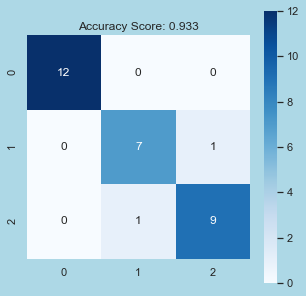

In [77]:
'''
3. Evaluate the performance using the following metric on the test set
    a. Confusion matrix
    b. Overall and class-wise accuracy
'''

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={ 'axes.facecolor':'lightblue','figure.facecolor':'lightblue'})


cm = metrics.confusion_matrix(Y_test,Y_pred)
overallAccuracy = np.trace(cm)/sum(cm.flatten())

classwiseAccuracy = np.zeros(len(cm))
for n in range(len(cm)):
    for i in range(len(cm)):
        for j in range(len(cm)):
            if (i!=n and j!=n) or (i==n and j==n):
                classwiseAccuracy[n]+=cm[i][j]

classwiseAccuracy/=sum(cm.flatten())

plt.figure(figsize=(5, 5))
plt.title('Accuracy Score: {0:3.3f}'.format(overallAccuracy), size=12)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues')

print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))

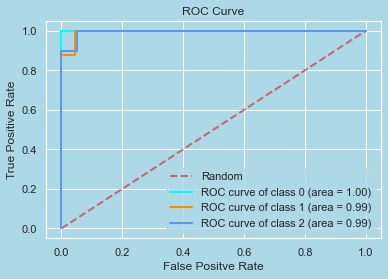

Area Under the curve for class 0 : 1.0
Area Under the curve for class 1 : 0.9943181818181819
Area Under the curve for class 2 : 0.995


In [78]:
# 3.c. ROC curve, AUC

from sklearn.preprocessing import label_binarize
y_score = model.predict_proba(X_test)
y_test = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2,
         color='r', label='Random', alpha=.8)

colors = ["aqua", "darkorange", "cornflowerblue"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

for i in range(n_classes):
    print("Area Under the curve for class {} : {}".format(i,roc_auc[i]))

In [80]:
""" 
6. Calculate the Bayes risk.
    Consider,
    λ =
        2 4 6
        1 2 3
        6 4 1

    Where λ is a loss function and rows and columns corresponds to classes (ci) and actions (aj) respectively, e.g. λ(a3/ c2) =4.
 """

 

' \n6. Calculate the Bayes risk.\n    Consider,\n    λ =\n        2 4 6\n        1 2 3\n        6 4 1\n\n    Where λ is a loss function and rows and columns corresponds to classes (ci) and actions (aj) respectively, e.g. λ(a3/ c2) =4.\n '